# Pytorch based on official doc Introduction to Pytorch 

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(root="data", train=True, 
    download=True, transform=ToTensor(), )

test_data = datasets.FashionMNIST(root="data", train=False,
    download=True, transform=ToTensor(), )

In [3]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), nn.ReLU(), nn.Linear(512, 512), nn.ReLU(), nn.Linear(512, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [8]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y), in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch%100 == 0:
            loss, current = loss.item(), batch*len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [9]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [10]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("done")

Epoch 1
-------------------------------
loss: 2.312259  [    0/60000]
loss: 2.296057  [ 6400/60000]
loss: 2.275776  [12800/60000]
loss: 2.269691  [19200/60000]
loss: 2.254359  [25600/60000]
loss: 2.219709  [32000/60000]
loss: 2.235388  [38400/60000]
loss: 2.191299  [44800/60000]
loss: 2.194493  [51200/60000]
loss: 2.163822  [57600/60000]
Test Error: 
 Accuracy: 47.8%, Avg loss: 2.156424 

Epoch 2
-------------------------------
loss: 2.170651  [    0/60000]
loss: 2.159404  [ 6400/60000]
loss: 2.097608  [12800/60000]
loss: 2.119868  [19200/60000]
loss: 2.065700  [25600/60000]
loss: 1.996933  [32000/60000]
loss: 2.041130  [38400/60000]
loss: 1.943093  [44800/60000]
loss: 1.959476  [51200/60000]
loss: 1.892565  [57600/60000]
Test Error: 
 Accuracy: 54.9%, Avg loss: 1.884977 

Epoch 3
-------------------------------
loss: 1.918921  [    0/60000]
loss: 1.891506  [ 6400/60000]
loss: 1.765785  [12800/60000]
loss: 1.820157  [19200/60000]
loss: 1.703855  [25600/60000]
loss: 1.639918  [32000/600

In [11]:
torch.save(model.state_dict(), "model1.pth")
print("saved to model1.pth")

saved to model1.pth


In [12]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model1.pth"))

<All keys matched successfully>

In [16]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker",
    "Bag", "Ankle boot", ]
model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


## Tensors

In [36]:
import torch
import numpy as np

In [37]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [38]:
x_np = torch.from_numpy(np.array(data))
print(x_np)

tensor([[1, 2],
        [3, 4]])


In [39]:
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 



In [40]:
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Random Tensor: 
 tensor([[0.3364, 0.7048],
        [0.5028, 0.5957]]) 



In [41]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.8730, 0.5158, 0.4791],
        [0.6362, 0.6918, 0.8956]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [42]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

if torch.cuda.is_available():
    tensor = tensor.to('cuda')

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [43]:
tensor = torch.tensor([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1, 2, 3])
First column:  tensor([1, 4, 7])
Last column: tensor([3, 6, 9])
tensor([[1, 0, 3],
        [4, 0, 6],
        [7, 0, 9]])


In [44]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1, 0, 3, 1, 0, 3, 1, 0, 3],
        [4, 0, 6, 4, 0, 6, 4, 0, 6],
        [7, 0, 9, 7, 0, 9, 7, 0, 9]])


In [52]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
print(y1, '\n\n', y2)


y3 = torch.matmul(tensor, tensor.T)
print(y3)

tensor([[ 10,  22,  34],
        [ 22,  52,  82],
        [ 34,  82, 130]]) 

 tensor([[ 10,  22,  34],
        [ 22,  52,  82],
        [ 34,  82, 130]])
tensor([[ 10,  22,  34],
        [ 22,  52,  82],
        [ 34,  82, 130]])


In [54]:
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.mul(tensor, tensor)

print(z1, '\n\n', z2, '\n\n', z3)

tensor([[ 1,  0,  9],
        [16,  0, 36],
        [49,  0, 81]]) 

 tensor([[ 1,  0,  9],
        [16,  0, 36],
        [49,  0, 81]]) 

 tensor([[ 1,  0,  9],
        [16,  0, 36],
        [49,  0, 81]])


In [56]:
agg = tensor.sum()
print(agg)

agg_item = agg.item()
print(agg_item, type(agg_item))

tensor(30)
30 <class 'int'>


In [57]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1, 0, 3],
        [4, 0, 6],
        [7, 0, 9]]) 

tensor([[ 6,  5,  8],
        [ 9,  5, 11],
        [12,  5, 14]])


In [59]:
t = torch.ones(5)
print(f"t: {t}")

n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [60]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [62]:
n = np.ones(5)
t = torch.from_numpy(n)

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## Datasets and Dataloaders

In [63]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [64]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

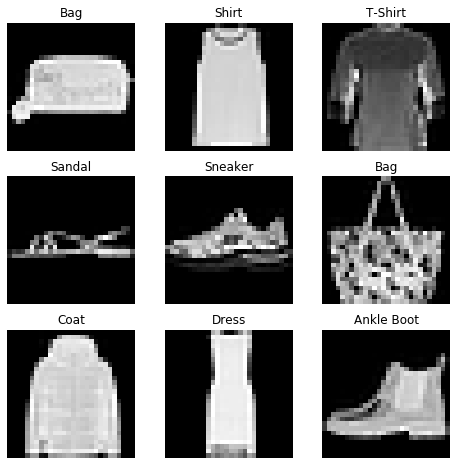

In [65]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [66]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [67]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


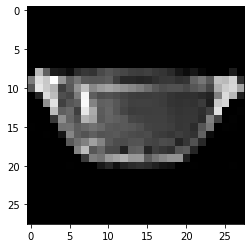

Label: 8


In [70]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Transforms

In [71]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## Build the Neural Network

In [72]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [73]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cuda device


In [74]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [75]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [77]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([4], device='cuda:0')


In [78]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [79]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [80]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [81]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.1394, -0.3152,  0.4595,  0.4251, -0.1407, -0.3301,  0.2539, -0.1120,
          0.0573, -0.0136, -0.1693, -0.0910, -0.7130, -0.2595,  0.4910,  0.1078,
         -0.1511,  0.5053, -0.6636,  0.1522],
        [-0.0575, -0.2614,  0.2191,  0.2988,  0.0317, -0.0749,  0.1248,  0.2029,
          0.3869,  0.2987, -0.4733,  0.1524, -0.2426,  0.3328,  0.2625,  0.4526,
         -0.2879,  0.5362, -0.1984,  0.1088],
        [-0.1206, -0.0424,  0.4086,  0.3124,  0.0132, -0.1855,  0.2120, -0.0960,
          0.2567,  0.2175, -0.6446, -0.0221, -0.6177, -0.0667,  0.2415,  0.2800,
          0.0085,  0.5341, -0.6475,  0.2914]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.4595, 0.4251, 0.0000, 0.0000, 0.2539, 0.0000, 0.0573,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4910, 0.1078, 0.0000, 0.5053,
         0.0000, 0.1522],
        [0.0000, 0.0000, 0.2191, 0.2988, 0.0317, 0.0000, 0.1248, 0.2029, 0.3869,
         0.2987, 0.0000, 0.1524, 0.0000, 0.3328, 0.26

In [82]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [83]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [84]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0262,  0.0192, -0.0312,  ...,  0.0333, -0.0348,  0.0244],
        [ 0.0216,  0.0267, -0.0165,  ..., -0.0244,  0.0006,  0.0186]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0254, 0.0151], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0125,  0.0188, -0.0423,  ..., -0.0323, -0.0292,  0.0290],
        [-0.0357,  0.0264, -0.0088,  ..., -0.0411,  0.0055, -0.0274]],
       device='cuda:0', grad_fn=<Sl

## Automatic Diiferentiation TORCH.AUTOGRAD

In [3]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [6]:
print('Gradient function for z =', z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)
print()
print(z, '\n\n', loss)

Gradient function for z = <AddBackward0 object at 0x7fc1a0771820>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7fc1a0771520>

tensor([3.4820, 3.5382, 0.9681], grad_fn=<AddBackward0>) 

 tensor(2.7897, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


In [7]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.3234, 0.3239, 0.2416],
        [0.3234, 0.3239, 0.2416],
        [0.3234, 0.3239, 0.2416],
        [0.3234, 0.3239, 0.2416],
        [0.3234, 0.3239, 0.2416]])
tensor([0.3234, 0.3239, 0.2416])


In [8]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [9]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


In [10]:
inp = torch.eye(5, requires_grad=True)
out = (inp+1).pow(2)
out.backward(torch.ones_like(inp), retain_graph=True)
print("First call\n", inp.grad)
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nSecond call\n", inp.grad)
inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nCall after zeroing gradients\n", inp.grad)

First call
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Second call
 tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradients
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])


## Optimizer Model Parameters

In [11]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [15]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [18]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.789060  [    0/60000]
loss: 0.877979  [ 6400/60000]
loss: 0.639077  [12800/60000]
loss: 0.842321  [19200/60000]
loss: 0.747211  [25600/60000]
loss: 0.732945  [32000/60000]
loss: 0.818604  [38400/60000]
loss: 0.795941  [44800/60000]
loss: 0.785059  [51200/60000]
loss: 0.773083  [57600/60000]
Test Error: 
 Accuracy: 72.0%, Avg loss: 0.759810 

Epoch 2
-------------------------------
loss: 0.751797  [    0/60000]
loss: 0.847196  [ 6400/60000]
loss: 0.606417  [12800/60000]
loss: 0.818203  [19200/60000]
loss: 0.725704  [25600/60000]
loss: 0.708562  [32000/60000]
loss: 0.793600  [38400/60000]
loss: 0.778819  [44800/60000]
loss: 0.762368  [51200/60000]
loss: 0.751682  [57600/60000]
Test Error: 
 Accuracy: 73.1%, Avg loss: 0.737320 

Epoch 3
-------------------------------
loss: 0.719441  [    0/60000]
loss: 0.819210  [ 6400/60000]
loss: 0.578530  [12800/60000]
loss: 0.797843  [19200/60000]
loss: 0.707147  [25600/60000]
loss: 0.688511  [32000/600

## Saving and Loading Model Weights

In [19]:
import torch
import torchvision.models as models

In [21]:
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')

In [22]:
model = models.vgg16()
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [23]:
torch.save(model, 'model2.pth')

In [24]:
model = torch.load('model2.pth')